### **Matplotlib practice notebook**

### **Matplotlib Overview**

![](https://matplotlib.org/_static/logo2_compressed.svg)

Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+. There is also a procedural "pylab" interface based on a state machine (like OpenGL), designed to closely resemble that of MATLAB, though its use is discouraged.

Matplotlib was originally written by John D. Hunter, since then it has an active development community, and is distributed under a BSD-style license. Michael Droettboom was nominated as matplotlib's lead developer shortly before John Hunter's death in August 2012, and further joined by Thomas Caswell.

Matplotlib 2.0.x supports Python versions 2.7 through 3.6. Python 3 support started with Matplotlib 1.2. Matplotlib 1.4 is the last version to support Python 2.6. Matplotlib has pledged not to support Python 2 past 2020 by signing the Python 3 Statement [wikipedia](https://en.wikipedia.org/wiki/Matplotlib).

**Why Can Matplotlib Be Confusing?**

Learning matplotlib can be a frustrating process at times. The problem is not that matplotlib’s documentation is lacking: the documentation is actually extensive. But the following issues can cause some challenges:

The library itself is huge, at something like 70,000 total lines of code.
Matplotlib is home to several different interfaces (ways of constructing a figure) and capable of interacting with a handful of different backends. (Backends deal with the process of how charts are actually rendered, not just structured internally.)
While it is comprehensive, some of matplotlib’s own public documentation is seriously out-of-date. The library is still evolving, and many older examples floating around online may take 70% fewer lines of code in their modern version.

#### Sources and Contents to review 
1. [Python Plotting With Matplotlib](https://realpython.com/python-matplotlib-guide/)
1. [Matplotlib Crash Course](https://www.youtube.com/watch?v=3Xc3CA655Y4)
1. [Tutorials -- matplotlib 3.3](https://matplotlib.org/tutorials/index.html)

#### **Pylab: What Is It, and Should I Use It?**

Matplotlib originally inspired to emulate commands from Mathworks’ MATLAB software. One relevant feature of MATLAB is its global style. The Python concept of importing is not heavily used in MATLAB, and most of MATLAB’s functions are readily available to the user at the top level.

Knowing that matplotlib has its roots in MATLAB helps to explain why pylab exists. pylab is a module within the matplotlib library that was built to mimic MATLAB’s global style. It exists only to bring a number of functions and classes from both NumPy and matplotlib into the namespace, making for an easy transition for former MATLAB users who were not used to needing import statements.

Ex-MATLAB converts (who are all fine people, I promise!) liked this functionality, because with from pylab import *, they could simply call plot() or array() directly, as they would in MATLAB.

**The issue here may be apparent to some Python users: using from pylab import * in a session or script is generally bad practice. Matplotlib now directly advises against using pylab**

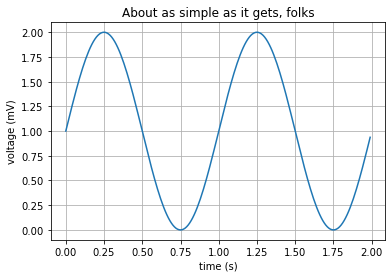

In [1]:
from pylab import *

t = arange(0.0, 2.0, 0.01)
s = 1 + sin(2*pi*t)
plot(t, s)

xlabel('time (s)')
ylabel('voltage (mV)')
title('About as simple as it gets, folks')
grid(True)
show()

Without the need for pylab, we can usually get away with just one canonical import:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

**One important big-picture matplotlib concept is its object hierarchy.**

If you’ve worked through any introductory matplotlib tutorial, you’ve probably called something like plt.plot([1, 2, 3]). This one-liner hides the fact that a plot is really a hierarchy of nested Python objects. A “hierarchy” here means that there is a tree-like structure of matplotlib objects underlying each plot.

A Figure object is the outermost container for a matplotlib graphic, which can contain multiple Axes objects. One source of confusion is the name: an Axes actually translates into what we think of as an individual plot or graph (rather than the plural of “axis,” as we might expect).

You can think of the Figure object as a box-like container holding one or more Axes (actual plots). Below the Axes in the hierarchy are smaller objects such as tick marks, individual lines, legends, and text boxes. Almost every “element” of a chart is its own manipulable Python object, all the way down to the ticks and labels:

![](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)

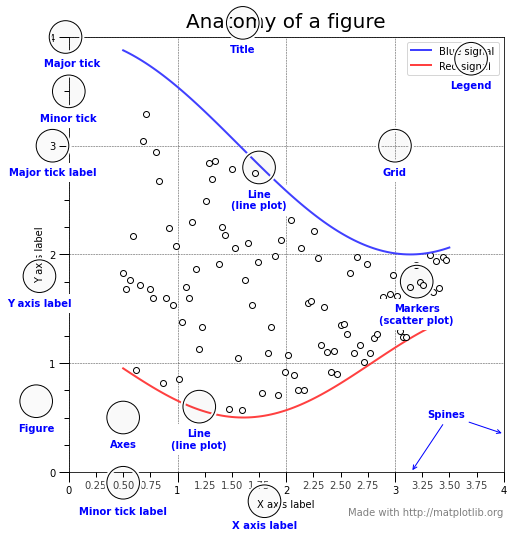

In [3]:
# This figure shows the name of several matplotlib elements composing a figure



np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

#### **Stateful Versus Stateless Approaches**

In this context the difference is probably best understood by a simple plotting example.

First the stateful example:

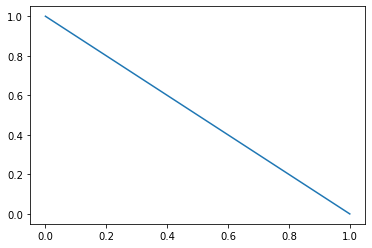

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot([0,1], [1,0])

Then the stateless (or rather object-oriented approach):

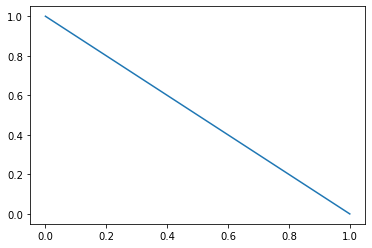

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
li = ax.plot([0,1], [1,0])

These carry out the same steps:

1. Create a figure object (matplotlib.figure.Figure)
1. Create a new plotting area object (matplotlib.axes.AxesSubplot) and add it to the figure
1. Create a new line into the plotting area (matplotlib.lines.Line2D)

In the object-oriented form we do the operations above rather explicitly and take the object references into variables (fig, ax, li). The references are not lost in the stateful interface, either, but they are hidden somewhere within matplotlib.

This difference becomes evident, when we try to change some properties, e.g. the size of the figure. With the OO approach:

In [6]:
fig.set_size_inches([10, 8])

With the stateful approach we first need to find the figure. There is a function for that; plt.gcf. So:

In [7]:
plt.gcf().set_size_inches([10,8])

<Figure size 720x576 with 0 Axes>

#### **Example 1**:

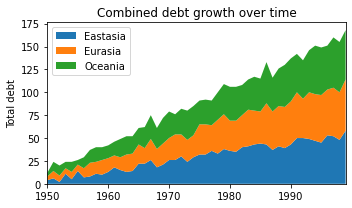

In [8]:
 rng = np.arange(50)
 rnd = np.random.randint(0, 10, size=(3, rng.size))
 yrs = 1950 + rng

 fig, ax = plt.subplots(figsize=(5, 3))
 ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
 ax.set_title('Combined debt growth over time')
 ax.legend(loc='upper left')
 ax.set_ylabel('Total debt')
 ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
 fig.tight_layout()

#### **Example 2**:

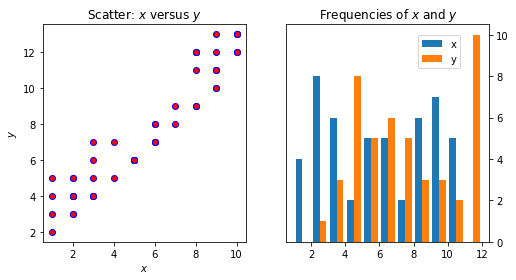

In [9]:
 x = np.random.randint(low=1, high=11, size=50)
 y = x + np.random.randint(1, 5, size=x.size)
 data = np.column_stack((x, y))

 fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

 ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
 ax1.set_title('Scatter: $x$ versus $y$')
 ax1.set_xlabel('$x$')
 ax1.set_ylabel('$y$')

 ax2.hist(data, bins=np.arange(data.min(), data.max()), label=('x', 'y'))
 ax2.legend(loc=(0.65, 0.8))
 ax2.set_title('Frequencies of $x$ and $y$')
 ax2.yaxis.tick_right()

#### **Plotting in Pandas**

The pandas library has become popular for not just for enabling powerful data analysis, but also for its handy pre-canned plotting methods. Interestingly though, pandas plotting methods are really just convenient wrappers around existing matplotlib calls.

That is, the plot() method on pandas’ Series and DataFrame is a wrapper around plt.plot(). One convenience provided, for example, is that if the DataFrame’s Index consists of dates, gcf().autofmt_xdate() is called internally by pandas to get the current Figure and nicely auto-format the x-axis.

In turn, remember that plt.plot() (the state-based approach) is implicitly aware of the current Figure and current Axes, so pandas is following the state-based approach by extension.

We can prove this “chain” of function calls with a bit of introspection. First, let’s construct a plain-vanilla pandas Series, assuming we’re starting out in a fresh interpreter session:

#### **Example 3**:

<class 'matplotlib.axes._subplots.AxesSubplot'>
True


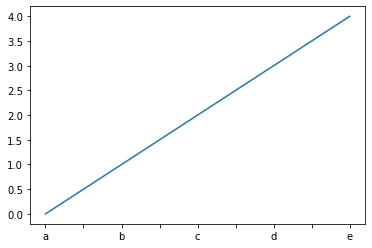

In [10]:
import pandas as pd

s = pd.Series(np.arange(5), index=list('abcde'))
ax = s.plot()

print(type(ax))

print(id(plt.gca()) == id(ax))

#### **Example 4**:

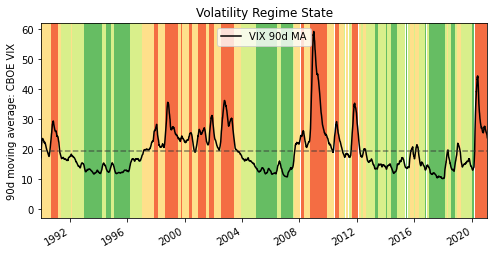

In [13]:
import pandas as pd
import matplotlib.transforms as mtransforms

url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=VIXCLS'
vix = pd.read_csv(url, index_col=0, parse_dates=True, na_values='.', infer_datetime_format=True, squeeze=True).dropna()
ma = vix.rolling('90d').mean()
state = pd.cut(ma, bins=[-np.inf, 14, 18, 24, np.inf], labels=range(4))

cmap = plt.get_cmap('RdYlGn_r')
ma.plot(color='black', linewidth=1.5, marker='', figsize=(8, 4),label='VIX 90d MA')
ax = plt.gca()  # Get the current Axes that ma.plot() references
ax.set_xlabel('')
ax.set_ylabel('90d moving average: CBOE VIX')
ax.set_title('Volatility Regime State')
ax.grid(False)
ax.legend(loc='upper center')
ax.set_xlim(xmin=ma.index[0], xmax=ma.index[-1])

trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
for i, color in enumerate(cmap([0.2, 0.4, 0.6, 0.8])):
    ax.fill_between(ma.index, 0, 1, where=state==i, facecolor=color, transform=trans)
ax.axhline(vix.mean(), linestyle='dashed', color='xkcd:dark grey', alpha=0.6, label='Full-period mean', marker='')